In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
from fat_tree import FatTree

# Generación de la topologia
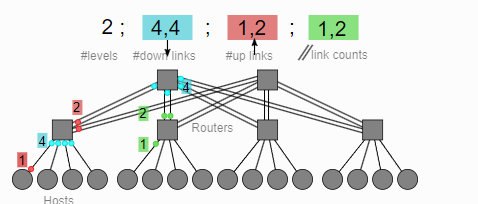

Primer paso es generar el Fat Tree a utilizar en la plataforma. La clase ´FatTree´ recibe los siguientes parametros:
- levels: Int
- Down links: list[int]
- Up links: list[int]
- Link Count: list[int]
- Debug: Bool

In [18]:
arqui1 = FatTree(2,[4,4],[1,2],[1,2])

0
1


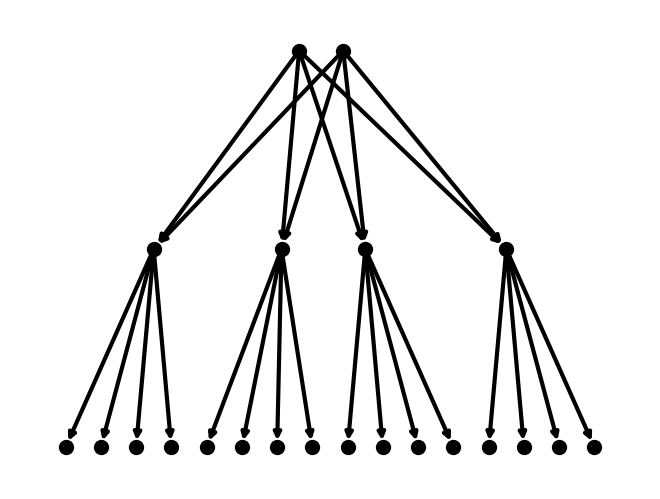

In [14]:
arqui1.draw()

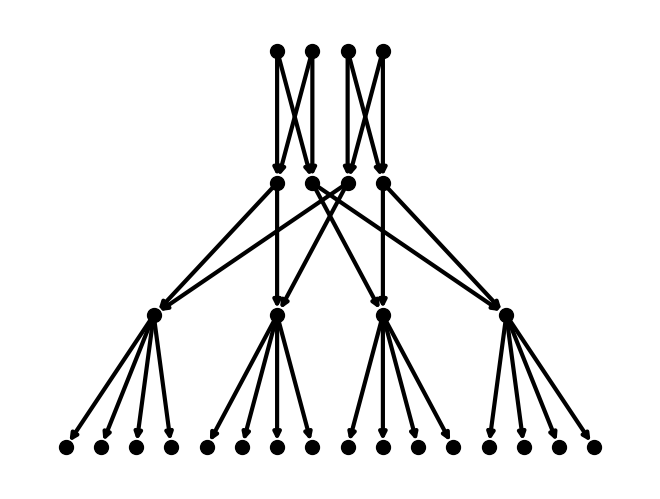

In [5]:
arqui2 = FatTree(3,[4,2,2],[1,2,2],[1,2,1])
arqui2.build()
arqui2.draw()

# Selecting the hw specs
Despues de generar el fat tree, 
1. node_types.json
2. 

## DFVS

attributes
- speed: Computational power (per core, in flop/s). **If you use DVFS, provide a comma-separated list of values for each pstate**
- pstate
  
properties
- wattage_per_state
- wattage_off
- sleep_pstates

In [15]:
%%writefile node_types.json
{
    "node_A": {
        "_coment": [
            "pstate values:",
            "* 0-2: real pstates",
            "0: p1 100 MFlops/s, [idle: 95W -> full burning: 200W]",
            "1: p2  50 MFlops/s, [idle: 93W -> full burning: 170W]",
            "2: p3  20 MFlops/s, [idel: 90W -> full burning: 150W]"
        ],
        "attributes": { "speed": "100.0Mf,50.0Mf,20.0Mf", "std": "1.0Mf", "pstate": "0" },
        "properties": [
            { "id": "wattage_per_state", "value": "95.0:200.0,93.0:170.0,90.0:150.0", "std": "5" },
            { "id": "wattage_off", "value": "2.0" }
        ]
    },
    "node_B": {
        "attributes": { "speed": "10.0Gf, 0.05f", "pstate": "0" },
        "properties": [
            { "id": "wattage_per_state", "value": "10.0:100.0:7.0, 9.75:5:7.25" },
            { "id": "wattage_off", "value": "2.0" }
        ]
    },
    "node_C": {
        "attributes": { "speed": "20.4Gf, 18.36Gf, 16.32Gf, 14.28Gf, 12.24Gf, 0.0Gf, 0.0Gf, 0.0Gf", "pstate": "0" },
        "properties": [
            { "id": "sleep_pstates", "value": "5:6:7"},
            { "id": "wattage_per_state", "value": "5.0:14.375, 5.0:12.9375, 5.0:11.5, 5.0:10.0625, 5.0:8.625, 2.0:2.0, 7.0:7.0, 6.0:6.0" },
            { "id": "wattage_off", "value": "2.0" }
        ]
    }
}

Overwriting node_types.json


In [16]:
%%writefile network_types.json
{

}

Overwriting network_types.json


In [17]:
%%writefile test02.json
{
    "nodes": [
        { "type": "node_A", "number": 6 },
        { "type": "node_B", "number": 10 }
    ],
    "cluster_network": "Network A",
    "dc_network": "Network A"
}

Overwriting test02.json


In [15]:
from hw_specs import PlatformSpecs

In [19]:
PLATFORM_IN  = "test02.json"
PLATFORM_OUT = "generated.xml"

iface =  PlatformSpecs(arqui1, PLATFORM_IN)
iface.assign()

In [20]:
!cat generated.xml

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE platform
  SYSTEM 'https://simgrid.org/simgrid.dtd'>
<platform version="4.1">
    <zone id="main" routing="Full">
        <zone id="cluster_compute" routing="Full">
            <host speed="1009793565.871f, 502166609.043f, 190766621.764f" pstate="0" id="c0">
                <prop id="wattage_per_state" value="97:199, 89:173, 92:146"/>
                <prop id="wattage_off" value="2.0"/>
            </host>
            <host speed="1009793565.871f, 502166609.043f, 190766621.764f" pstate="0" id="c1">
                <prop id="wattage_per_state" value="97:199, 89:173, 92:146"/>
                <prop id="wattage_off" value="2.0"/>
            </host>
            <host speed="1009793565.871f, 502166609.043f, 190766621.764f" pstate="0" id="c2">
                <prop id="wattage_per_state" value="97:199, 89:173, 92:146"/>
                <prop id="wattage_off" value="2.0"/>
            </host>
            <host speed="1009793565.871f, 502166609